# Robotics, Vision & Control 3e: for Python
## Chapter 4: Mobile Robot Vehicles

Copyright (c) 2021- Peter Corke

In [1]:
'''try:
    from google.colab import output
    print('Running on CoLab')
    #!pip install roboticstoolbox-python>=1.0.2
    !pip install git+https://github.com/petercorke/robotics-toolbox-python@future
    !pip install spatialmath-python>=1.1.5
    !pip install --no-deps rvc3python
    !pip install bdsim
    COLAB = True
except ModuleNotFoundError:
    COLAB = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
'''
from IPython.display import HTML

#%matplotlib inline
import matplotlib.pyplot as plt

# add RTB examples folder to the path
import sys, os.path
import RVC3 as rvc
sys.path.append(os.path.join(rvc.__path__[0], 'models'))

# helper function to run bdsim in a subprocess and transfer results using a pickle file
import pickle
def run_shell(tool, **params):
    global out
    pyfile = os.path.join(rvc.__path__[0], "models", tool+".py")
    cmd = f"python {pyfile} -H +a -o"
    for key, value in params.items():
        cmd += f' --global "{key}={value}"'
    print(cmd)
    os.system(cmd)
    with open("bd.out", "rb") as f:
        out = pickle.load(f)

# ------ standard imports ------ #
import numpy as np
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *


# 4.1 Wheeled Mobile Robots


## 4.1.1 Car-Like Mobile Robots


<div style="background-color:red">
<span style="background-color:red; font-size:20pt">NOTE</span>

There are issues in running bdsim from inside Jupyter.  We have two options, disable all graphics (which is a bit dull) or run bdsim from a subprocess with its own popout windows.

For Colab we can only do the first option.  

Otherwise, we use the wrapper function `run_shell()` defined in the first cell to spawn a new Python instance to run the block diagram which will pop up new windows on your screen to display a simple animation showing the vehicle's motion in the plane.  This makes it a bit harder to get parameters and data between Jupyter and the `bdsim` simulation, so:
* parameter values are passed to `bdsim` as `--global` command line options.
* the `-o` command line option to `bdsim` causes it to write results as a pickle file, which are then imported back into Jupyter.</div>

In [3]:
if COLAB:
  %run -m lanechange -H -g  # no graphics
else:
  
 run_shell("lanechange")

NameError: name 'COLAB' is not defined

In [4]:
run_shell("lanechange")

python c:\Users\muham\anaconda3\lib\site-packages\RVC3\models\lanechange.py -H +a -o


In [5]:
out

t      = ndarray:float64 (115,)
x      = ndarray:float64 (115, 3)
xnames = ['x', 'y', '$\\theta$'] (list)
ynames = [] (list)

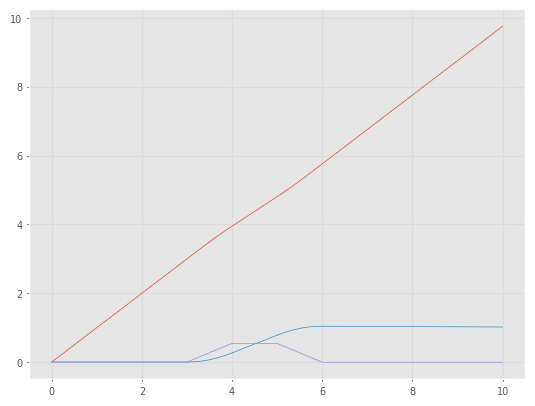

In [6]:
plt.plot(out.t, out.x);  # q vs time

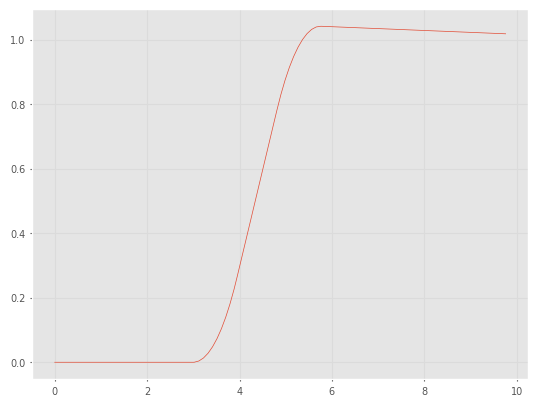

In [7]:
plt.plot(out.x[:,0], out.x[:,1]);  # x vs y

In [ ]:
plt.close(1)

### 4.1.1.1 Driving to a Point


In [ ]:
pgoal = (5, 5);

In [ ]:
qs = (8, 5, pi / 2);

In [1]:
if COLAB:
    %run -i -m drivepoint -H -g
else:
    run_shell("drivepoint", pgoal=pgoal, qs=qs)

NameError: name 'COLAB' is not defined

In [2]:
run_shell("drivepoint", pgoal=pgoal, qs=qs)

NameError: name 'run_shell' is not defined

In [ ]:
q = out.x;  # configuration vs time
plt.plot(q[:, 0], q[:, 1]);

### 4.1.1.2 Driving Along a Line


In [ ]:
L = (1, -2, 4);

In [ ]:
qs = (8, 5, pi / 2);

In [ ]:
if COLAB:
  %run -m driveline -H -g  # no graphics
else:
  run_shell("driveline", L=L, qs=qs)

### 4.1.1.3 Driving Along a Path


In [ ]:
if COLAB:
  %run -m drivepursuit -H -g  # no graphics
else:
  run_shell("drivepursuit")

### 4.1.1.4 Driving to a Configuration


In [ ]:
qg = (5, 5, pi / 2);

In [ ]:
qs = (9, 5, 0);

In [ ]:
if COLAB:
  %run -m driveconfig -H -g  # no graphics
else:
  run_shell("driveconfig", qg=qg, qs=qs)

In [ ]:
q = out.x;  # configuration vs time
plt.plot(q[:, 0], q[:, 1]);

# 4.2 Aerial Robots


In [ ]:
if COLAB:
  %run -m quadrotor -H -g  # no graphics
else:
  run_shell("quadrotor")

In [ ]:
t = out.t; x = out.x;
x.shape

In [ ]:
plt.plot(t, x[:, 0], t, x[:, 1]);

# 4.4 Wrapping Up


## 4.4.1 Further Reading


In [ ]:
veh = Bicycle(speed_max=1, steer_max=np.deg2rad(30));
veh.q

In [ ]:
veh.step([0.3, 0.2])
veh.q

In [ ]:
veh.deriv(veh.q, [0.3, 0.2])